In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
def simplify(dataframe, dictionary):
    for key in dictionary:
        repcolumn = sum([dataframe.fillna(0)[i] for i in dictionary[key]])
        dataframe = dataframe.drop(columns=dictionary[key])
        dataframe[key] = repcolumn
    return dataframe


In [3]:
def cities_data(city_dic,gent_dic):
    data = pd.DataFrame()
    for cityfile in city_dic.keys():
        city_data = pd.DataFrame()
        venues = pd.read_csv('{}_venues.csv'.format(cityfile))
        a = venues.groupby('categories').count()
        a = a/a.sum()
        a = a.rename(columns={'name': city_dic[cityfile]})
        city_data = city_data.append(a[city_dic[cityfile]])
        #Here we deal with the local restaurant issue
        try:
            #r_dic = {'Local Restaurant':['{} Restaurant'.format(gent_dic[cityfile])]}
            r_dic = {'Restaurant':['Restaurant','{} Restaurant'.format(gent_dic[cityfile])]}
            city_data = simplify(city_data,r_dic)
        except:
            pass
        data = data.append(city_data)
    return data

Getting the data

In [4]:
city_dic = {'sao_paulo':'São Paulo', 'cdmx':'Ciudad de México', 'lima':'Lima', 'new_york':'New York City','bogota':'Bogotá','rio':'Rio de Janeiro','santiagop':'Santiago','los_angeles':'Los Angeles','caracas':'Caracas','buenos_aires':'Buenos Aires'}
gent_dic = {'sao_paulo':'Brazilian', 'cdmx':'Mexican', 'lima':'Peruvian', 'new_york':'American','bogota':'Colombian','rio':'Brazilian','santiagop':'Chilean','los_angeles':'American','caracas':'Venezuelan','buenos_aires':'Argentinian'}

In [5]:
data= cities_data(city_dic,gent_dic)

In [6]:
tcity_dic = {'salvador':'Salvador','toronto':'Toronto','chicago':'Chicago','guayaquil':'Guayaquil','medellin':'Medellín','albany':'Albany'}
tgent_dic = {'salvador':'Brazilian','toronto':'Canadian','chicago':'American','guayaquil':'Ecuadorian','medellin':'Colombian','albany':'American'}

In [7]:
tdata = cities_data(tcity_dic,tgent_dic)
tcomplement = [i for i in data.columns if i not in tdata.columns]
complementframe = pd.DataFrame(columns=tcomplement)
tdata = pd.concat([tdata,complementframe],axis=1)[data.columns]

In [8]:
data

,ATM,Acai House,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,...,Marine Terminal,Medical School,Music Festival,Observatory,Real Estate Office,Romanian Restaurant,Satay Restaurant,Used Auto Dealership,Veterans' Organization,Yoshoku Restaurant
São Paulo,0.000074,0.001148,0.001815,0.000148,0.000037,0.000074,0.000074,0.000333,0.000037,0.000222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ciudad de México,0.000287,NaN,0.000738,0.000041,0.000041,NaN,0.000123,0.000410,0.000041,0.000861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lima,NaN,NaN,0.000741,0.000124,0.000124,NaN,NaN,0.000371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New York City,0.000098,NaN,0.001280,0.000197,NaN,0.000164,0.000821,0.000033,0.000098,0.000788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bogotá,NaN,NaN,0.000622,NaN,0.000156,NaN,0.000311,0.002023,NaN,0.002334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rio de Janeiro,0.000146,0.001973,0.001023,0.000073,NaN,0.000073,0.000073,0.001023,NaN,0.001315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Santiago,NaN,NaN,0.001060,0.000096,0.000096,NaN,NaN,0.002890,0.000193,0.001156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Los Angeles,0.002422,NaN,0.002026,0.000176,0.000088,0.000044,0.000044,0.001145,NaN,0.000881,...,0.000396,0.000044,0.000044,0.000044,0.000176,0.000044,0.000044,0.000088,0.000176,0.000044
Caracas,NaN,NaN,0.001087,NaN,NaN,NaN,0.000362,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buenos Aires,NaN,NaN,0.001215,0.000152,NaN,0.000152,0.000152,0.000152,0.000152,0.000152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tdata

,ATM,Acai House,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,...,Marine Terminal,Medical School,Music Festival,Observatory,Real Estate Office,Romanian Restaurant,Satay Restaurant,Used Auto Dealership,Veterans' Organization,Yoshoku Restaurant
Salvador,0.002313,0.000386,0.001414,NaN,NaN,0.000514,0.000900,0.002056,0.000129,0.000257,...,NaN,NaN,0.000129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Toronto,0.000524,NaN,0.001397,0.000175,NaN,0.000349,0.000611,0.000175,0.000087,0.000262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chicago,0.001253,NaN,0.001817,0.000251,NaN,0.000125,0.000752,0.001191,0.000188,0.001128,...,NaN,NaN,NaN,NaN,0.000125,NaN,NaN,0.000063,NaN,NaN
Guayaquil,NaN,NaN,0.000591,NaN,NaN,NaN,NaN,0.001183,NaN,0.000591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medellín,NaN,NaN,0.000476,NaN,0.000951,NaN,NaN,0.001427,NaN,0.000476,...,NaN,NaN,NaN,NaN,0.000476,NaN,NaN,NaN,NaN,NaN
Albany,0.001092,NaN,0.002183,NaN,0.000364,0.000364,NaN,0.002547,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000728,NaN,NaN,NaN,NaN,NaN


Treating the dataframes

In [10]:
simplify_dic={'Airport':[i for i in data.columns if 'Airport' in i],
              'Gym Venue':['Gym','Gym / Fitness Center'],
              'Coffee Shop':['Coffee Shop','Café']}

todrop = [i for i in data.columns if data[i].notna().sum() ==1]#drops columns if only a single city in training has it
todrop += ['Airport','Border Crossing','Neighborhood','Bus Station']

data = simplify(data,simplify_dic)
data = data.drop(columns=todrop,errors='ignore')
tdata = simplify(tdata,simplify_dic)
tdata = tdata.drop(columns=todrop,errors='ignore')

In [11]:
cdata = data.append(tdata)
cdata.to_csv('vdescription.csv',index=False)

In [12]:
selected=['Coffee Shop', 'Bakery', 'Pizza Place', 'Gym Venue', 'Park']
cdata[selected].round(4).to_latex('table1.txt')

Finding most common venues per city


In [13]:
numofcat =5
columns = ['Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']+['{}th Most Common Venue'.format(i+1) for i in range(3,numofcat)]

In [14]:
most_common=pd.DataFrame(columns=columns)
for cityind in cdata.index:
    datarow = cdata.loc[[cityind]].mean()
    row = list(datarow.nlargest(numofcat).keys())
    most_common.loc[cityind] = row
most_common

,Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
São Paulo,Restaurant,Bakery,Gym Venue,Pizza Place,Coffee Shop
Ciudad de México,Restaurant,Taco Place,Coffee Shop,Gym Venue,Bakery
Lima,Restaurant,Park,Seafood Restaurant,Coffee Shop,Chinese Restaurant
New York City,Coffee Shop,Pizza Place,Deli / Bodega,Chinese Restaurant,Gym Venue
Bogotá,Restaurant,Coffee Shop,Burger Joint,Fast Food Restaurant,Bakery
Rio de Janeiro,Restaurant,Gym Venue,Bar,Bakery,Pizza Place
Santiago,Coffee Shop,Plaza,Restaurant,Bakery,Chinese Restaurant
Los Angeles,Coffee Shop,Mexican Restaurant,Restaurant,Pizza Place,Fast Food Restaurant
Caracas,Bakery,Italian Restaurant,Pharmacy,Coffee Shop,Restaurant
Buenos Aires,Coffee Shop,Restaurant,Pizza Place,Ice Cream Shop,Bakery


In [15]:
most_common.to_latex('table2.txt')

In [16]:
a = data.fillna(0).corr()[selected].loc[selected]
a.to_latex('tablecorr.txt')

PCA


In [17]:
fdata = data.fillna(0)
centered_data=np.matrix(fdata-fdata.mean())
covmat=np.matrix(fdata.cov())

In [18]:
U,s,Vt = np.linalg.svd(centered_data)
S = np.diag(s)

In [19]:
k=2
Rebuiltdata = U[:,:k]*S[:k,:k]*Vt[:k,:]
#PCdata =  U[:,:]*S[:,:k]
PCdata = (U*S)[:,:k]

In [20]:
Rebuiltdataframe = pd.DataFrame(Rebuiltdata,index=fdata.index,columns=fdata.columns)
components = ['PC {}'.format(i+1) for i in range(k)]
PCdataframe = pd.DataFrame(PCdata,index=fdata.index,columns=components)

In [21]:
PCdataframe

,PC 1,PC 2
São Paulo,-0.010740,0.034164
Ciudad de México,-0.099565,-0.013033
Lima,-0.024121,-0.062020
New York City,0.047164,-0.007241
Bogotá,0.009242,-0.010365
Rio de Janeiro,-0.017431,0.021941
Santiago,0.036542,-0.004833
Los Angeles,0.040198,-0.018638
Caracas,0.040761,0.010227
Buenos Aires,-0.022050,0.049798


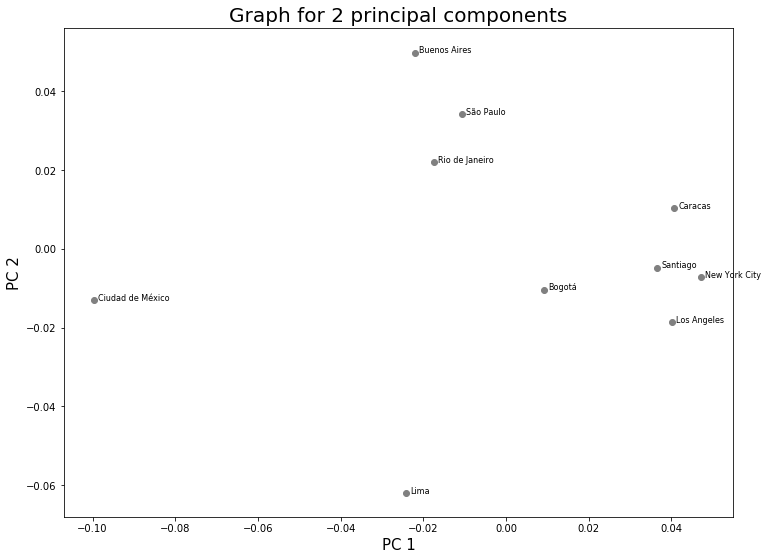

In [22]:
fig, ax = plt.subplots(figsize = (12,9))

for cityfile in city_dic.keys():
    x = PCdataframe.loc[[city_dic[cityfile]]]['PC 1']
    y = PCdataframe.loc[[city_dic[cityfile]]]['PC 2']
    plt.scatter(x, y,color='grey')
    plt.text(x+.001, y, city_dic[cityfile], fontsize=8)


ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
ax.set_title('Graph for 2 principal components',fontsize=20)

plt.show()

In [23]:
principal = Vt[:k,:]
principalframe = pd.DataFrame(principal,index=components,columns=fdata.columns)
principalframe

,ATM,Acai House,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,...,Weight Loss Center,Notary,Astrologer,Cable Car,Port,Rugby Stadium,Street Fair,Plane,Gym Venue,Coffee Shop
PC 1,0.003827,-0.002550,0.004102,0.000361,0.000057,0.000223,0.002208,-0.004099,0.000153,0.001681,...,0.001268,0.000429,0.000231,0.002674,-0.000397,-0.000252,-0.000435,0.000578,-0.105301,-0.105252
PC 2,-0.004996,0.009399,0.004769,0.000097,-0.001213,0.001103,0.000434,-0.013762,0.002248,-0.002018,...,-0.000844,-0.000738,0.000576,0.002109,0.002668,0.001044,0.001905,-0.000293,0.242366,0.253152


In [24]:
numofcat = 5
columns = ['MRV', '2nd MRV', '3rd MRV']
columns += ['{}th MRV'.format(i+1) for i in range(3,numofcat)]

In [25]:
most_common = pd.DataFrame(columns=columns)
for pcrow in components:
    datarow = principalframe.loc[[pcrow]].mean()
    rowp = list(datarow.nlargest(numofcat).keys())
    most_common.loc[pcrow+' +'] = rowp
    
    rown = list(datarow.nsmallest(numofcat).keys())
    rown.reverse()
    most_common.loc[pcrow+' -'] = rown
most_common.to_latex('table4.txt')
most_common

,MRV,2nd MRV,3rd MRV,4th MRV,5th MRV
PC 1 +,Chinese Restaurant,Mexican Restaurant,Grocery Store,Sandwich Place,Italian Restaurant
PC 1 -,Coffee Shop,Gym Venue,Seafood Restaurant,Taco Place,Restaurant
PC 2 +,Bakery,Pizza Place,Coffee Shop,Gym Venue,Plaza
PC 2 -,Taco Place,Chinese Restaurant,Fried Chicken Joint,Seafood Restaurant,Park


Comparing to other cities

In [26]:
tmatrix = np.matrix(tdata.fillna(0)-fdata.mean()) #centering in the training
PCtest = tmatrix*np.linalg.inv(Vt)[:,:k]
PCtestframe = pd.DataFrame(PCtest,index=tdata.index,columns=components)
PCtestframe

,PC 1,PC 2
Salvador,-0.009020,0.017991
Toronto,0.037075,-0.006353
Chicago,0.041102,-0.024018
Guayaquil,0.013092,-0.035721
Medellín,0.011253,-0.002540
Albany,0.033940,-0.016593


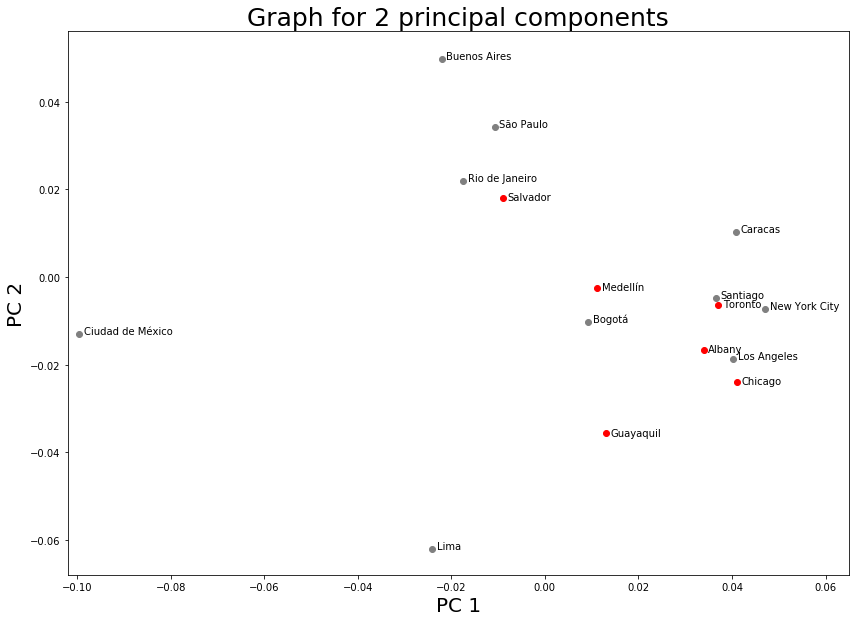

In [27]:
#fig, ax = plt.subplots(figsize = (16,12))
fig, ax = plt.subplots(figsize = (14,10))

for cityfile in city_dic.keys():
    x = PCdataframe.loc[[city_dic[cityfile]]]['PC 1']
    y = PCdataframe.loc[[city_dic[cityfile]]]['PC 2']
    plt.scatter(x, y,color='grey')
    plt.text(x+.001, y, city_dic[cityfile], fontsize=10)


for cityfile in tcity_dic.keys():
    x = PCtestframe.loc[[tcity_dic[cityfile]]]['PC 1']
    y = PCtestframe.loc[[tcity_dic[cityfile]]]['PC 2']
    plt.scatter(x, y,color='red')
    plt.text(x+.001, y-.0005, tcity_dic[cityfile], fontsize=10)
    
ax.set_xlim(-.102,.065)
ax.set_xlabel('PC 1', fontsize=20)
ax.set_ylabel('PC 2', fontsize=20)
ax.set_title('Graph for 2 principal components',fontsize=25)
plt.savefig('PCgraph.png', bbox_inches = "tight",dpi=500)

plt.show()

MAHALANOBIS DISTANCES

In [28]:
nPCdataframe = PCdataframe/PCdataframe.std()
distances = [[np.linalg.norm(i-j) for i in np.array(nPCdataframe)]for j in np.array(nPCdataframe)]
distframe = pd.DataFrame(distances,index=PCdataframe.index,columns=PCdataframe.index)
#distframe

In [29]:
Sm = np.matrix(PCdataframe.cov())
distances2 = [[np.sqrt(float((i-j)*np.linalg.inv(Sm)*np.transpose(i-j))) for i in PCdata]for j in PCdata]
dist2frame = pd.DataFrame(distances2,index=PCdataframe.index,columns=PCdataframe.index)
dist2frame

,São Paulo,Ciudad de México,Lima,New York City,Bogotá,Rio de Janeiro,Santiago,Los Angeles,Caracas,Buenos Aires
São Paulo,0.000000,2.481692,3.093731,1.845049,1.492861,0.418477,1.630013,2.032814,1.374820,0.559806
Ciudad de México,2.481692,0.000000,2.292511,3.257211,2.412976,2.137158,3.027906,3.102723,3.197934,2.645375
Lima,3.093731,2.292511,0.000000,2.360515,1.811592,2.692246,2.271544,1.990282,2.723646,3.580328
New York City,1.845049,3.257211,2.360515,0.000000,0.846396,1.709508,0.247724,0.396213,0.576985,2.384961
Bogotá,1.492861,2.412976,1.811592,0.846396,0.000000,1.191344,0.630431,0.735418,0.960540,2.047257
Rio de Janeiro,0.418477,2.137158,2.692246,1.709508,1.191344,0.000000,1.471621,1.821860,1.343115,0.897731
Santiago,1.630013,3.027906,2.271544,0.247724,0.630431,1.471621,0.000000,0.449345,0.491156,2.178435
Los Angeles,2.032814,3.102723,1.990282,0.396213,0.735418,1.821860,0.449345,0.000000,0.924236,2.589219
Caracas,1.374820,3.197934,2.723646,0.576985,0.960540,1.343115,0.491156,0.924236,0.000000,1.882271
Buenos Aires,0.559806,2.645375,3.580328,2.384961,2.047257,0.897731,2.178435,2.589219,1.882271,0.000000


In [30]:
PCcdataframe = PCdataframe.append(PCtestframe)
PCcdata = np.matrix(PCcdataframe)
distances3 = [[np.sqrt(float((i-j)*np.linalg.inv(Sm)*np.transpose(i-j))) for i in PCcdata]for j in PCcdata]
dist3frame = pd.DataFrame(distances3,index=PCcdataframe.index,columns=PCcdataframe.index)
dist3frame

,São Paulo,Ciudad de México,Lima,New York City,Bogotá,Rio de Janeiro,Santiago,Los Angeles,Caracas,Buenos Aires,Salvador,Toronto,Chicago,Guayaquil,Medellín,Albany
São Paulo,0.000000,2.481692,3.093731,1.845049,1.492861,0.418477,1.630013,2.032814,1.374820,0.559806,0.519213,1.675041,2.188609,2.298977,1.272204,1.902992
Ciudad de México,2.481692,0.000000,2.292511,3.257211,2.412976,2.137158,3.027906,3.102723,3.197934,2.645375,2.239105,3.035864,3.137344,2.600318,2.478908,2.961042
Lima,3.093731,2.292511,0.000000,2.360515,1.811592,2.692246,2.271544,1.990282,2.723646,3.580328,2.583445,2.239635,1.889431,1.178641,2.059424,1.941965
New York City,1.845049,3.257211,2.360515,0.000000,0.846396,1.709508,0.247724,0.396213,0.576985,2.384961,1.484274,0.225404,0.553684,1.183927,0.809997,0.418987
Bogotá,1.492861,2.412976,1.811592,0.846396,0.000000,1.191344,0.630431,0.735418,0.960540,2.047257,0.993981,0.630089,0.830450,0.816288,0.254472,0.582569
Rio de Janeiro,0.418477,2.137158,2.692246,1.709508,1.191344,0.000000,1.471621,1.821860,1.343115,0.897731,0.225275,1.509933,1.961629,1.966190,1.009194,1.678787
Santiago,1.630013,3.027906,2.271544,0.247724,0.630431,1.471621,0.000000,0.449345,0.491156,2.178435,1.246433,0.050087,0.622482,1.117177,0.565254,0.380900
Los Angeles,2.032814,3.102723,1.990282,0.396213,0.735418,1.821860,0.449345,0.000000,0.924236,2.589219,1.601587,0.399349,0.173405,0.812427,0.822891,0.153359
Caracas,1.374820,3.197934,2.723646,0.576985,0.960540,1.343115,0.491156,0.924236,0.000000,1.882271,1.130928,0.537094,1.096421,1.593797,0.771210,0.871888
Buenos Aires,0.559806,2.645375,3.580328,2.384961,2.047257,0.897731,2.178435,2.589219,1.882271,0.000000,1.058518,2.224646,2.746673,2.846649,1.831028,2.461307


In [35]:
dist3frame[PCcdataframe.index].round(2).to_latex('table5.txt')

K means Clustering

In [32]:
from scipy.stats import zscore
clusterdata = data
zdata = clusterdata.fillna(0).apply(zscore)

In [33]:
from sklearn.cluster import KMeans

labels = KMeans(n_clusters=4, random_state=0).fit(zdata).labels_

cities = list(city_dic.keys())
for i in range(len(cities)):
    print(city_dic[cities[i]],labels[i])

São Paulo 2
Ciudad de México 0
Lima 0
New York City 1
Bogotá 0
Rio de Janeiro 2
Santiago 0
Los Angeles 1
Caracas 0
Buenos Aires 3
